<a href="https://colab.research.google.com/github/genice-dev/GenIce3/blob/main/API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Installation

On Google Colaboratory, you must install GenIce3 and extra plugins by yourself.


In [1]:
try:
    import google.colab
    %pip install git+https://github.com/genice-dev/GenIce3.git git+https://github.com/vitroid/genice3-svg.git
except:
    %pip install --no-deps ../genice3-svg
    %pip install svgwrite
    pass


Processing /Volumes/Cache/Dropbox/gitbox/genice3-svg
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for genice3-svg: filename=genice3_svg-0.2.0-py2.py3-none-any.whl size=11995 sha256=db00dac232c8f90ffef9ac2ca81a2e8ba273c6e38a8914621298cecd9197a6e0
  Stored in directory: /Users/matto/Library/Caches/pip/wheels/31/ea/df/ffe3c8a329442936aaf6d7140f88452bb9b8d41011f7a57d2c
Successfully built genice3-svg

[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Output in Gromacs format.

A simplest example.


In [3]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell, Exporter, Molecule

genice = GenIce3()
genice.unitcell = UnitCell("ice11")
Exporter("gromacs", water_model=Molecule("spce")).dump(genice)

Generated by GenIce https://github.com/vitroid/GenIce 
48
    1SOL      O    1   0.220  -0.003   0.095
    1SOL      H    2   0.299  -0.044   0.062
    1SOL      H    3   0.224   0.087   0.062
    2SOL      O    4   0.220   0.256   0.004
    2SOL      H    5   0.299   0.302   0.032
    2SOL      H    6   0.224   0.259  -0.092
    3SOL      O    7   0.229   0.003   0.371
    3SOL      H    8   0.150  -0.043   0.399
    3SOL      H    9   0.226   0.001   0.275
    4SOL      O   10   0.229   0.262   0.462
    4SOL      H   11   0.150   0.303   0.428
    4SOL      H   12   0.226   0.172   0.428
    5SOL      O   13   0.669  -0.003   0.095
    5SOL      H   14   0.673   0.087   0.062
    5SOL      H   15   0.748  -0.044   0.062
    6SOL      O   16   0.669   0.256   0.004
    6SOL      H   17   0.673   0.259  -0.092
    6SOL      H   18   0.748   0.302   0.032
    7SOL      O   19   0.678   0.003   0.371
    7SOL      H   20   0.599  -0.043   0.399
    7SOL      H   21   0.675   0.001   0.2

You can also invoke the plugins directly, instead of loading via the loaders such as `UnitCell` or `Exporter`.


In [4]:
from genice3.genice import GenIce3
from genice3.exporter.gromacs import dump
from genice3.unitcell.ice11 import UnitCell as ice11

genice = GenIce3(unitcell=ice11())
dump(genice, water_model="4site")

Generated by GenIce https://github.com/vitroid/GenIce 
64
    1ICE     OW    1   0.220  -0.003   0.095
    1ICE    HW1    2   0.299  -0.044   0.062
    1ICE    HW2    3   0.224   0.087   0.062
    1ICE     MW    4   0.231   0.003   0.087
    2ICE     OW    5   0.220   0.256   0.004
    2ICE    HW1    6   0.299   0.302   0.032
    2ICE    HW2    7   0.224   0.259  -0.092
    2ICE     MW    8   0.231   0.263  -0.005
    3ICE     OW    9   0.229   0.003   0.371
    3ICE    HW1   10   0.150  -0.043   0.399
    3ICE    HW2   11   0.226   0.001   0.275
    3ICE     MW   12   0.219  -0.003   0.362
    4ICE     OW   13   0.229   0.262   0.462
    4ICE    HW1   14   0.150   0.303   0.428
    4ICE    HW2   15   0.226   0.172   0.428
    4ICE     MW   16   0.219   0.256   0.454
    5ICE     OW   17   0.669  -0.003   0.095
    5ICE    HW1   18   0.673   0.087   0.062
    5ICE    HW2   19   0.748  -0.044   0.062
    5ICE     MW   20   0.680   0.003   0.087
    6ICE     OW   21   0.669   0.256   0.0

## Generate an SVG image

Here we are using the Forms syntax of Google Colab to choose the ice type.


In [5]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell, Exporter
from logging import getLogger, basicConfig, INFO
from IPython.display import SVG, display

ice = "DDR"  # @param ["ice1h", "ice2", "ice3", "DDR"] {allow-input: true}

basicConfig(level=INFO)
genice = GenIce3()
genice.unitcell = UnitCell(ice)
svg = Exporter("svg").dumps(genice, shadow=True, rotate="y5,x5")
display(SVG(svg))

INFO:root:original_density=np.float64(0.5340861864563906)
INFO:root:The HB graph is generated from the bond length: 0.33080409999999993
INFO:root:density=np.float64(0.5340861864563906) specified.
INFO:root:scale=np.float64(1.0)
INFO:root:Extra exporter plugin: svg


ValueError: could not convert string to float: np.str_('y')

## Generate a PNG image

PNG renderer is also included in genice_svg package.


In [6]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell, Exporter
from logging import getLogger, basicConfig, INFO
from IPython.display import SVG, display


basicConfig(level=INFO)
genice = GenIce3()
genice.unitcell = UnitCell("CS2")
genice.replication_matrix = [[2, 0, 0], [0, 2, 0], [0, 0, 2]]
png = Exporter("png").dumps(
    genice, shadow="#8882", encode=False, bgcolor="#fff", rotate="y5,x5"
)
png

INFO:root:original_density=np.float64(0.01700919011988991)
INFO:root:The HB graph is generated from the bond length: 1.1
INFO:root:density=0.81 specified.
INFO:root:scale=np.float64(3.624658770006385)
INFO:root:Extra exporter plugin: png


TypeError: parse_options() got an unexpected keyword argument 'shadow'

## Store the image in a file

Save it in a PNG file.


In [7]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell, Exporter
from logging import getLogger, basicConfig, INFO

basicConfig(level=INFO)
genice = GenIce3()
genice.unitcell = UnitCell("ice3")
genice.replication_matrix = [[2, 0, 0], [0, 2, 0], [0, 0, 2]]
with open("ice3.png", "wb") as f:
    Exporter("png").dump(genice, f, shadow="#8882", bgcolor="#fff", rotate="y5,x5")

INFO:root:original_density=np.float64(0.0011637864512692793)
INFO:root:The HB graph is generated from the bond length: 3.0
INFO:root:density=1.165 specified.
INFO:root:scale=np.float64(10.003474655682915)
INFO:root:Extra exporter plugin: png


TypeError: parse_options() got an unexpected keyword argument 'shadow'

## Analysis

Some statistical analyses are also available.


INFO:root:original_density=np.float64(0.0037363002324809053)
INFO:root:density=0.92 specified.
INFO:root:scale=np.float64(6.26780322426606)
INFO:DependencyEngine:Executing: replica_vectors
INFO:DependencyEngine:0.0003 sec for replica_vectors
INFO:DependencyEngine:Executing: lattice_sites
INFO:DependencyEngine:0.0001 sec for lattice_sites
INFO:DependencyEngine:Executing: replica_vector_labels
INFO:DependencyEngine:0.0000 sec for replica_vector_labels
INFO:DependencyEngine:Executing: graph
INFO:DependencyEngine:0.0008 sec for graph
INFO:DependencyEngine:Executing: fixedEdges
INFO:DependencyEngine:0.0001 sec for fixedEdges
INFO:DependencyEngine:Executing: digraph
INFO:root:Depol. loop 45: [0. 0. 0.]
INFO:DependencyEngine:0.0050 sec for digraph
INFO:DependencyEngine:Executing: cell
INFO:DependencyEngine:0.0001 sec for cell
INFO:DependencyEngine:Executing: anions
INFO:DependencyEngine:0.0000 sec for anions
INFO:DependencyEngine:Executing: cations
INFO:DependencyEngine:0.0000 sec for cations

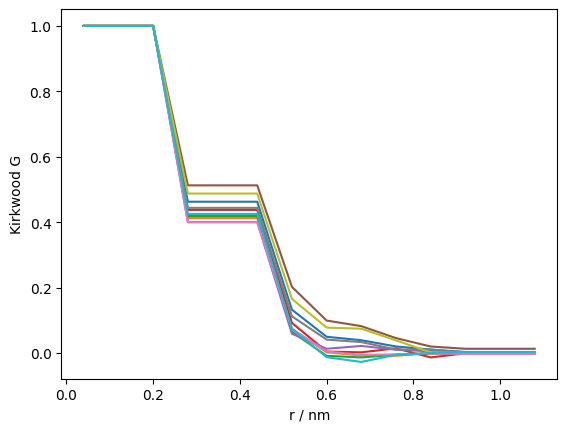

In [8]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell, Exporter
import numpy as np
from matplotlib import pyplot as plt
import random

genice = GenIce3(replication_matrix=[[2, 0, 0], [0, 2, 0], [0, 0, 2]])
genice.unitcell = UnitCell("ice1c")
for seed in range(1000, 1010):
    genice.seed = seed
    kg = Exporter("_KG").calculate(genice)
    plt.plot(kg[:, 0], kg[:, 1])

plt.xlabel("r / nm")
plt.ylabel("Kirkwood G")
plt.show()

## Logging

You may want to see the process log.


In [9]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell, Exporter
from logging import getLogger, INFO, DEBUG, WARNING, basicConfig

basicConfig(level=INFO)
logger = getLogger()

genice = GenIce3(replication_matrix=[[16, 0, 0], [0, 16, 0], [0, 0, 16]])
genice.unitcell = UnitCell("ice1c")
gro = Exporter("gromacs", water_model="spce").dumps(genice)
with open("ice1c.gro", "w") as f:
    f.write(gro)

logger.setLevel(WARNING)

INFO:root:original_density=np.float64(0.0037363002324809053)
INFO:root:density=0.92 specified.
INFO:root:scale=np.float64(6.26780322426606)
INFO:guest_processor:arg={}
INFO:DependencyEngine:Executing: replica_vectors
INFO:DependencyEngine:0.0295 sec for replica_vectors
INFO:DependencyEngine:Executing: lattice_sites
INFO:DependencyEngine:0.0154 sec for lattice_sites
INFO:DependencyEngine:Executing: anions
INFO:DependencyEngine:0.0000 sec for anions
INFO:DependencyEngine:Executing: cations
INFO:DependencyEngine:0.0000 sec for cations
INFO:DependencyEngine:Executing: site_occupants
INFO:DependencyEngine:0.0000 sec for site_occupants
INFO:DependencyEngine:Executing: replica_vector_labels
INFO:DependencyEngine:0.0028 sec for replica_vector_labels
INFO:DependencyEngine:Executing: graph
INFO:DependencyEngine:0.4333 sec for graph
INFO:DependencyEngine:Executing: fixedEdges
INFO:DependencyEngine:0.0409 sec for fixedEdges
INFO:DependencyEngine:Executing: digraph
INFO:root:Depol. loop 412: [0. 0.

## Raw data

You can access the "raw" (internal) data.


In [10]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell
from logging import getLogger, INFO, DEBUG, WARNING, basicConfig

basicConfig(level=INFO)
logger = getLogger()

genice = GenIce3()
genice.unitcell = UnitCell("xFAU", rep=0)
# skeletal HB network in nx.Graph object
print(genice.graph)
# unit cell in numpy array
print(genice.cell)
# lattice sites in fractional coordinates
print(genice.lattice_sites)
# directed graph of HB network
print(genice.digraph)

basicConfig(level=WARNING)

Graph with 96 nodes and 192 edges
[[1.56129177e+00 0.00000000e+00 0.00000000e+00]
 [9.56015486e-17 1.56129177e+00 0.00000000e+00]
 [9.56015486e-17 9.56015486e-17 1.56129177e+00]]
[[0.00000000e+00 2.50000000e-01 1.25000000e-01]
 [0.00000000e+00 1.25000000e-01 2.50000000e-01]
 [1.25000000e-01 0.00000000e+00 2.50000000e-01]
 [2.50000000e-01 0.00000000e+00 1.25000000e-01]
 [2.50000000e-01 1.25000000e-01 0.00000000e+00]
 [1.25000000e-01 2.50000000e-01 0.00000000e+00]
 [8.75000000e-01 0.00000000e+00 2.50000000e-01]
 [7.50000000e-01 1.40917683e-17 1.25000000e-01]
 [7.50000000e-01 8.75000000e-01 0.00000000e+00]
 [8.75000000e-01 7.50000000e-01 0.00000000e+00]
 [7.65404249e-18 7.50000000e-01 1.25000000e-01]
 [0.00000000e+00 8.75000000e-01 2.50000000e-01]
 [7.50000000e-01 1.25000000e-01 0.00000000e+00]
 [8.75000000e-01 2.50000000e-01 2.17458108e-17]
 [0.00000000e+00 2.50000000e-01 8.75000000e-01]
 [5.11456641e-17 1.25000000e-01 7.50000000e-01]
 [8.75000000e-01 1.53080850e-17 7.50000000e-01]
 [7.5

### Visualization by Plotly

Use the raw data to plot by yourself.


In [11]:
waters = genice.lattice_sites  # cached; no additional calculation
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Scatter3d(
            x=waters[:, 0],
            y=waters[:, 1],
            z=waters[:, 2],
            marker=dict(size=10),
            mode="markers",
        )
    ]
)
fig.show()

## Integration with py3Dmol.

Py3Dmol works on Google Colaboratory.


In [12]:
try:
    import google.colab
    %pip install git+https://github.com/vitroid/genice3-py3dmol.git
except:
    %pip install --no-deps ../genice3-py3dmol py3dmol
    pass


Processing /Volumes/Cache/Dropbox/gitbox/genice3-py3dmol
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for genice3-py3dmol: filename=genice3_py3dmol-0.1.0-py2.py3-none-any.whl size=3302 sha256=446f68f3186e14f0837b26ea8b453843abc21c2cf54d9495e1aed77134a0d451
  Stored in directory: /Users/matto/Library/Caches/pip/wheels/4c/8c/96/325a86e16c6e00b7fbb6698c94088c7d3b75caa27fbfd85279
Successfully built genice3-py3dmol

[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell, Exporter

genice = GenIce3(unitcell=UnitCell("xFAU", rep=1))
Exporter("plotly").figure(genice, type="fixed").show()

In [14]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell, Exporter

genice = GenIce3(unitcell=UnitCell("xFAU", rep=0))
Exporter("py3dmol").get_view(genice, water_model="3site").show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [15]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell, Exporter

genice = GenIce3(unitcell=UnitCell("xFAU", rep=0))
svg = Exporter("svg").dumps(genice, water_model="3site", rotate="y10,x10", hydrogen=0.5)
display(SVG(svg))

TypeError: Options.__init__() got an unexpected keyword argument 'water_model'

## Interaction with MDAnalysis


In [16]:
try:
    import google.colab
    %pip install git+https://github.com/vitroid/genice3-mdanalysis.git
except:
    %pip install --no-deps ../genice3-mdanalysis
    %pip install MDAnalysis


Processing /Volumes/Cache/Dropbox/gitbox/genice3-mdanalysis
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for genice3-mdanalysis: filename=genice3_mdanalysis-0.1.0-py2.py3-none-any.whl size=3405 sha256=05db96894e9271a8a31064efce805ed174f13a63d84b31a00d4df2ce0750e0de
  Stored in directory: /Users/matto/Library/Caches/pip/wheels/41/82/7c/43d76bb939dfc54a14069709df48925593965099696cac77cd
Successfully built genice3-mdanalysis

[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 36.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25

In [17]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell, Exporter

genice = GenIce3(unitcell=UnitCell("ice1h_unit"))
universe = Exporter("mdanalysis").get_universe(genice, water_model="4site")
# Save as a .pdb file.
allatoms = universe.select_atoms("all")
allatoms.write("1h_unit.pdb")

/Users/matto/Library/Caches/pypoetry/virtualenvs/genice3-Xscl5EVV-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

/Users/matto/Library/Caches/pypoetry/virtualenvs/genice3-Xscl5EVV-py3.11/lib/python3.11/site-packages/MDAnalysis/lib/util.py:708: RuntimeWarning:

Constructed NamedStream from a NamedStream

/Users/matto/Library/Caches/pypoetry/virtualenvs/genice3-Xscl5EVV-py3.11/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:1282: UserWarning:

Found no information for attr: 'altLocs' Using default value of ' '

/Users/matto/Library/Caches/pypoetry/virtualenvs/genice3-Xscl5EVV-py3.11/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:1282: UserWarning:

Found no information for attr: 'icodes' Using default value of ' '

/Users/matto/Library/Caches/pypoetry/virtualenvs/genice3-Xscl5EVV-py3.11/lib/python3.11/site-packages/MDAnaly